In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.

In [16]:
data = pd.read_excel(r"C:\Users\Danish\Desktop\Data Science\DS WORK\Shack labs\Assign 1\Part1.xlsx")
# data

In [18]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [19]:
target = data['House price of unit area']
data.drop(columns=['House price of unit area'],inplace=True)

In [23]:
print(target.shape,data.shape)
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=.3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(414,) (414, 8)
(289, 8) (125, 8) (289,) (125,)


In [25]:
L_reg = LinearRegression()

In [27]:
L_reg.fit(x_train,y_train)
print(L_reg.score(x_test,y_test))
L_reg_pred = L_reg.predict(x_test)
# print(r2_score(L_reg_pred,y_test))

0.6575182413444836


In [61]:
pred_df1 = pd.DataFrame(data = {
    "pred_values":L_reg_pred,
#     "test_values":y_test,
    "pred_label": list(["pred"]*len(L_reg_pred)),
#     "test_label": list(["actual"]*len(y_test))
})
pred_df2 = pd.DataFrame(data = {
#     "pred_values":L_reg_pred,
    "pred_values":y_test,
#     "pred_label": list(["pred"]*len(L_reg_pred)),
    "pred_label": list(["actual"]*len(y_test))
})
pred_df = pd.concat([pred_df1,pred_df2],ignore_index=True,)
# pred_df

ValueError: color kwarg must have one color per data set. 8 data sets and 1 colors were provided

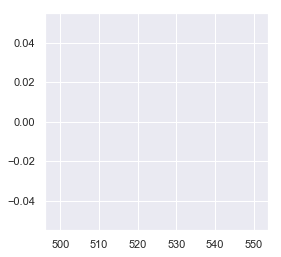

In [63]:
plt.figure(figsize=(4,4))
sns.distplot(data)
plt.show()

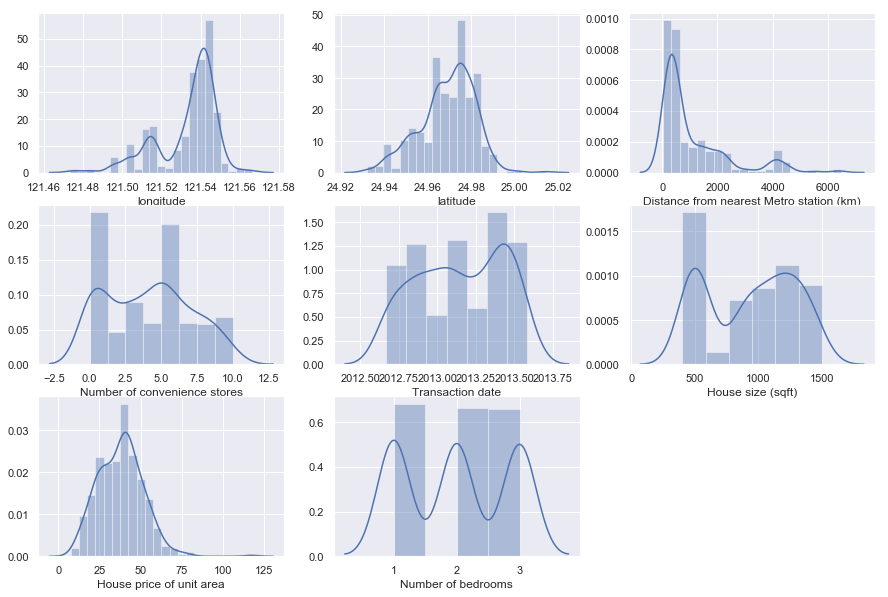

In [3]:
from pylab import *

sns.set(rc={"figure.figsize": (15, 10)}); #np.random.seed(0)
# x = np.random.randn(100)

subplot(3,3,1)
ax = sns.distplot(data["longitude"])

subplot(3,3,2)
ax = sns.distplot(data["latitude"])#, rug=False, hist=False)

subplot(3,3,3)
ax = sns.distplot(data['Distance from nearest Metro station (km)'])#, vertical=True)

subplot(3,3,4)
ax = sns.distplot(data['Number of convenience stores'])#, shade=True, color="r")


subplot(3,3,5)
ax = sns.distplot(data["Transaction date"])

subplot(3,3,6)
ax = sns.distplot(data['House size (sqft)'])#, rug=False, hist=False)

subplot(3,3,7)
ax = sns.distplot(data['House price of unit area'])#, vertical=True)

subplot(3,3,8)
ax = sns.distplot(data["Number of bedrooms"])#, shade=True, color="r")
plt.show()

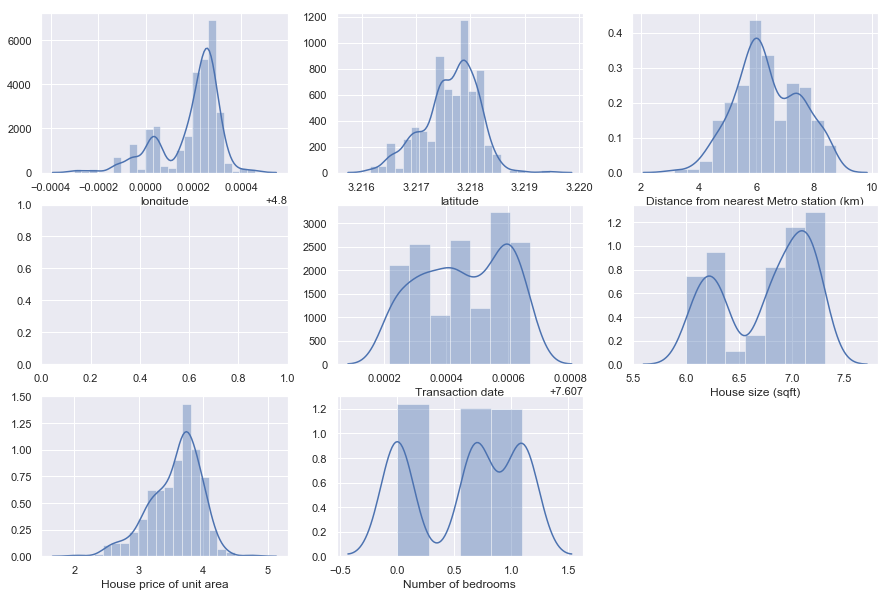

In [4]:
from pylab import *

sns.set(rc={"figure.figsize": (15, 10)}); #np.random.seed(0)
# x = np.random.randn(100)

subplot(3,3,1)
ax = sns.distplot(np.log(data["longitude"]))

subplot(3,3,2)
ax = sns.distplot(np.log(data["latitude"]))#, rug=False, hist=False)

subplot(3,3,3)
ax = sns.distplot(np.log(data['Distance from nearest Metro station (km)']))#, vertical=True)

subplot(3,3,4)
# ax = sns.distplot(np.log(data['Number of convenience stores']))#, shade=True, color="r")


subplot(3,3,5)
ax = sns.distplot(np.log(data["Transaction date"]))

subplot(3,3,6)
ax = sns.distplot(np.log(data['House size (sqft)']))#, rug=False, hist=False)

subplot(3,3,7)
ax = sns.distplot(np.log(data['House price of unit area']))#, vertical=True)

subplot(3,3,8)
ax = sns.distplot(np.log(data["Number of bedrooms"]))#, shade=True, color="r")
plt.show()

In [7]:
target = data["House price of unit area"]
data.drop(columns=["House price of unit area"],inplace=True)

KeyError: 'House price of unit area'

In [8]:
print(target.shape,data.shape)
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=.2)
print(x_train.shape,x_test.shape,y_train.shape,y_text.shape)

(414,) (414, 8)


NameError: name 'y_text' is not defined

In [9]:
from sklearn.linear_model import LinearRegression
L_reg = LinearRegression()

In [329]:
L_reg.fit(x_train,y_train)
print(L_reg.score(x_test,y_test))
L_reg_pred = L_reg.predict(x_test)
print(r2_score(L_reg_pred,y_test))

0.6067481972289677
0.5382862441785653


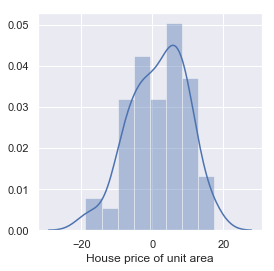

In [311]:
plt.figure(figsize=(4,4))
sns.distplot(L_reg_pred-y_test)
plt.show()

In [313]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [314]:
x_train_s = sclr.fit_transform(x_train)
x_test_s = sclr.fit_transform(x_test)

# y_train_s = sclr.transform(y_train)
# x_test_s = sclr.transform(x_test)

In [330]:
L_reg_s = LinearRegression()
L_reg_s.fit(x_train_s,y_train)
L_reg_s_pred = L_reg_s.predict(x_test)
print(L_reg_s.score(x_test_s,y_test))
print(r2_score(L_reg_s_pred,y_test))


0.5297166179846358
-0.29961601532674975


C:\Users\Danish\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


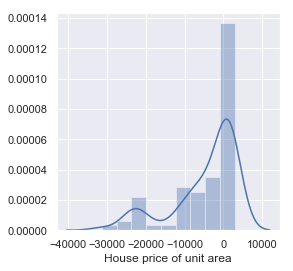

In [318]:
plt.figure(figsize=(4,4))
sns.distplot(L_reg_s_pred-y_test)
plt.show()

In [319]:
from sklearn.model_selection import cross_val_score
L_reg_3 = LinearRegression()
L_reg_3.fit(x_train_s,y_train)
reg=cross_val_score(L_reg_3, x_train_s,y_train,cv=5,scoring="neg_mean_squared_error")
L_reg_3_pred = L_reg_3.predict(x_test)

C:\Users\Danish\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


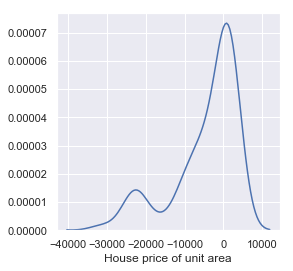

In [327]:
plt.figure(figsize=(4,4))
sns.distplot(L_reg_3_pred-y_test,kde=True,hist=False,)
plt.show()

In [328]:
from sklearn.metrics import r2_score
sc = r2_score(L_reg_3_pred,y_test)
sc

-0.29961601532674975

In [305]:

np.mean(reg)

-87.88243958796646

In [259]:
# data.hist(figsize=(15,10))
# plt.show()


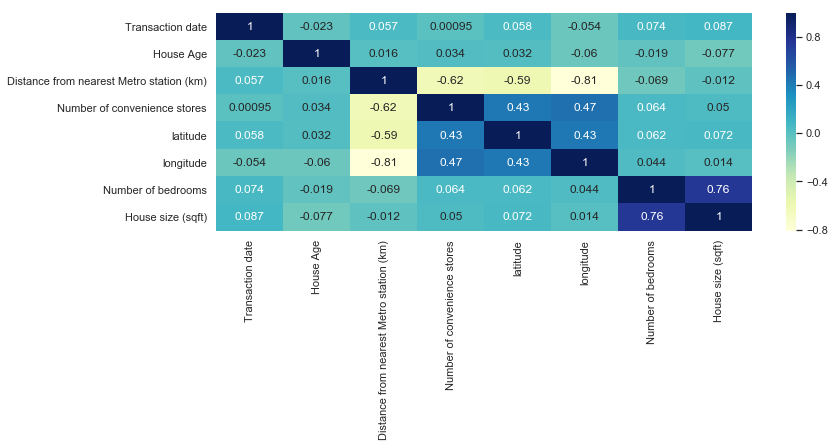

In [224]:
plt.figure(figsize=(12,4))
sns.heatmap(x_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [58]:
log_data = pd.DataFrame()
# calculation lognormal of Data
for i in list(x_train.columns):
    log_data[i] = np.log(x_train[i]+1)

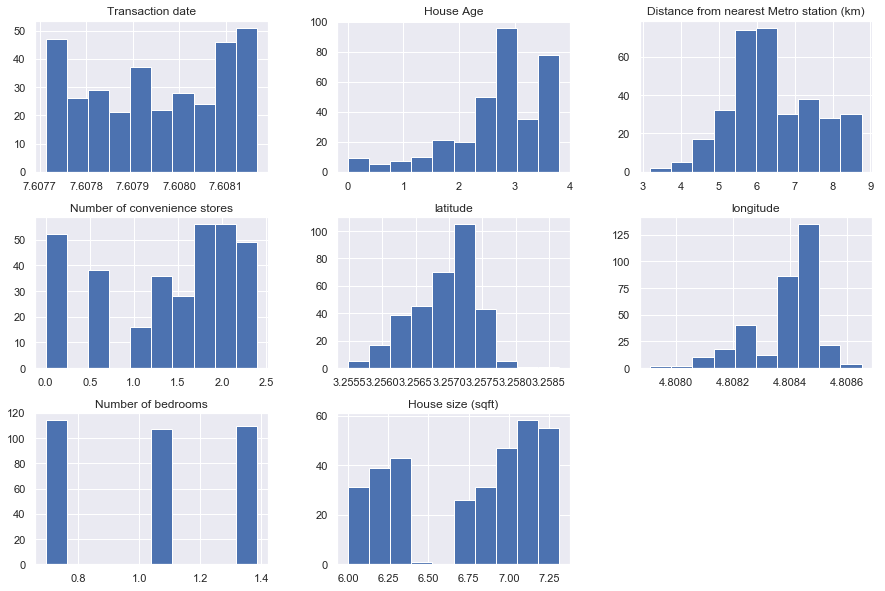

In [264]:
log_data.hist(figsize=(15,10))
plt.show()

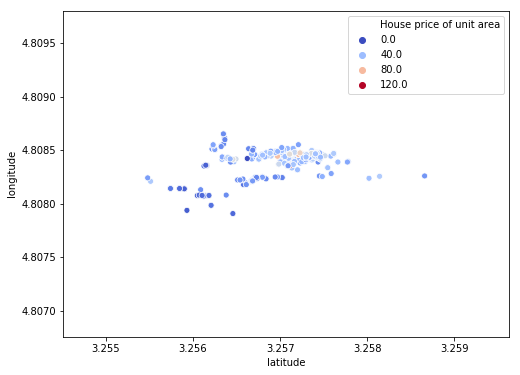

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="latitude",y="longitude",data=log_data,hue=target,palette="coolwarm")
plt.show()
